# Lab | Classification, Handling Imbalanced Data

## Lab Instructions

### Scenario

You are working as an analyst for an internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

### Instructions

In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned in class.

Here is the list of steps to be followed (building a simple model without balancing the data):

#### Round 1
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You will see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.
 
#### Round 2
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.

#### Round 3
 -  apply K-fold cross validation on your models before and check the model score.
**Note**: So far we have not balanced the data.

#### Round 4
 - fit a Random forest Classifier on the data and compare the accuracy. 
 - tune the hyper paramters with gridsearch and check the results.

Managing imbalance in the dataset

- Check for the imbalance.
- Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
- Each time fit the model and see how the accuracy of the model is.

---


## Importing libraries and data

In [34]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Round 1

In [2]:
data = pd.read_csv("data/DATA_Customer-Churn.csv")
churn_data = pd.DataFrame(data)
display(churn_data)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


## Data cleaning

### Datatypes

In [3]:
display(churn_data.dtypes)
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors = 'coerce')

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Duplicates

In [4]:
churn_data = churn_data.drop_duplicates()

### Null values

In [5]:
churn_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churn_data["TotalCharges"] = churn_data["TotalCharges"].fillna(churn_data["TotalCharges"].mean())
churn_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

### Churn column


In [7]:
churn_data['Churn'] = churn_data['Churn'].map({'Yes': 1, 'No': 0})
churn_data['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 6994, dtype: int64

## Preprocessing

### Splitting data

In [8]:
selected_features = ['tenure', 'SeniorCitizen', 'MonthlyCharges', 'TotalCharges']

X = pd.DataFrame(churn_data[selected_features])
y = churn_data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

### Preprocessing y

In [9]:
np.unique(y, return_counts=True)

(array([0, 1]), array([5144, 1850]))

In [10]:
y.value_counts()

Churn
0    5144
1    1850
Name: count, dtype: int64

### Standardising data

array([[<Axes: title={'center': 'Churn'}>]], dtype=object)

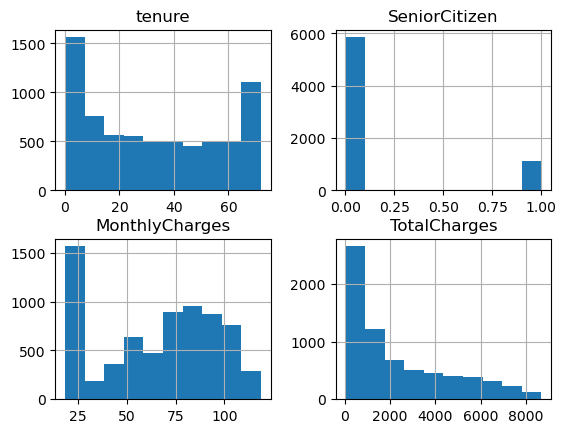

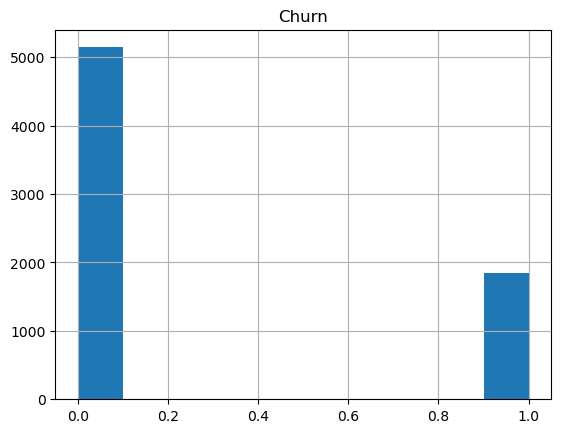

In [11]:
X.hist()
pd.DataFrame(y).hist()

#### MinMax scaler

In [12]:
mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = pd.DataFrame(mm_scaler.transform(X_train))
X_test_mm = pd.DataFrame(mm_scaler.transform(X_test))

#### Standard scaler

In [13]:
s_scaler = StandardScaler()
s_scaler.fit(X_train)
X_train_s = pd.DataFrame(s_scaler.transform(X_train))
X_test_s = pd.DataFrame(s_scaler.transform(X_test))

## Models

### Logistic regression

In [14]:
log_model = LogisticRegression() 


log_model.fit(X_train_mm, y_train)

y_pred_train_log = log_model.predict(X_train_mm)
y_pred_test_log = log_model.predict(X_test_mm)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.792183,0.787879
1,Precision,0.660494,0.611594
2,Recall,0.457917,0.470982


#### Confusion matrix

Note: our aim is to predict customers that are likely to churn. We would most like to avoid false negatives (type 2 error) because not identifying a customer that is likely to churn is worse than incorrectly flagging a customer as a churn risk.

Therefore, wee want to keep recall as high as posible
recall TP/TP+FN

<b> Train

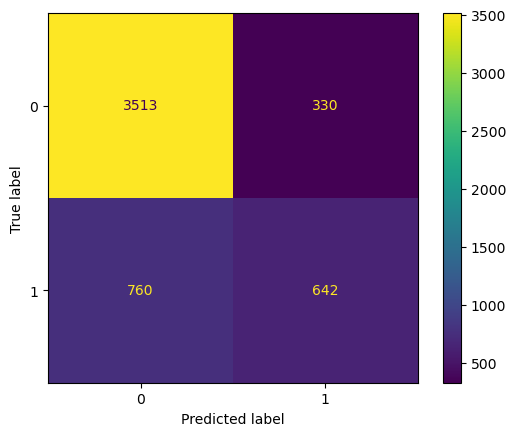

In [15]:
cm_train = confusion_matrix(y_train, y_pred_train_log, labels = log_model.classes_)
disp = ConfusionMatrixDisplay(cm_train)
disp.plot()

<b> Test

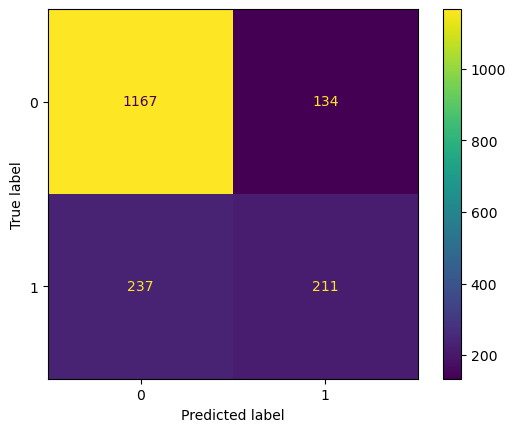

In [16]:
cm_test = confusion_matrix(y_test, y_pred_test_log, labels = log_model.classes_)
disp_test = ConfusionMatrixDisplay(cm_test)
disp_test.plot()

### KNN classification

In [17]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train_s, y_train) # train model
y_pred = model.predict(X_test_s.values) # predict test
y_pred_train=model.predict(X_train_s.values) # predict train (for sanity checks)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred),
                                        precision_score(y_test, y_pred),
                                        recall_score(y_test, y_pred)]})

display(performance_log)

,Error_metric,Train,Test
0,Accuracy,0.862154,0.759863
1,Precision,0.776691,0.533493
2,Recall,0.679743,0.497768


#### Confusion matrix

<b> Train

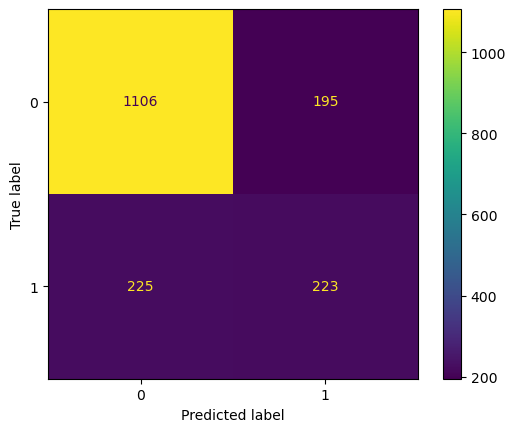

In [18]:
cm = confusion_matrix(y_test, y_pred, labels= model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

## Function to evaluate classification model

In [19]:
def evaluate_classification_model(y_train, y_pred_train, y_test, y_pred_test):
    """
    Generates performance metrics and comparisons of labels with their predicted values
    :param y_train: training labels
    :param y_pred_train: predictions from the model on the training set
    :param y_test: test labels
    :param y_pred_test: predictions from the model on the test set
    :returns: 3 dfs - Accuracy, Precision, and Recall scores, y_train vs. y_pred_train and y_test vs. y_pred_dist
    """
    performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
    
    pd.options.display.float_format = '{:.2f}'.format

    df_train = pd.DataFrame({'Real': y_train, 'Predicted': y_pred_train})
    df_test  = pd.DataFrame({'Real': y_test,  'Predicted': y_pred_test})

    return performance_df, df_train, df_test



In [20]:
y_train = y_train.ravel()

y_test = y_test.ravel()

y_pred_test = y_test.ravel()


## calling the function
error_metrics_df,y_train_vs_predicted, y_test_vs_predicted =evaluate_classification_model(y_train, y_pred_train,y_test, y_pred)
error_metrics_df

,Error_metric,Train,Test
0,Accuracy,0.86,0.76
1,Precision,0.78,0.53
2,Recall,0.68,0.50


# Round 2

## Decision Tree

Note: our aim is to predict customers that are likely to churn. We would most like to avoid false negatives (type 2 error) because not identifying a customer that is likely to churn is worse than incorrectly flagging a customer as a churn risk.

Therefore, wee want to keep recall as high as posible
recall TP/TP+FN

In [28]:
# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=5)

model.fit(X_train, y_train)

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.80,0.79
1,Precision,0.69,0.61
2,Recall,0.44,0.45


#### Confusion matrix

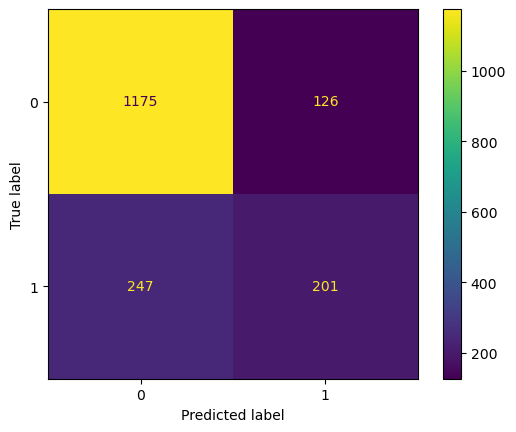

In [29]:
cm = confusion_matrix(y_test, y_pred_test_dt, labels=model.classes_)
disp = ConfusionMatrixDisplay(cm)
disp.plot()

#### Feature importance

<BarContainer object of 4 artists>

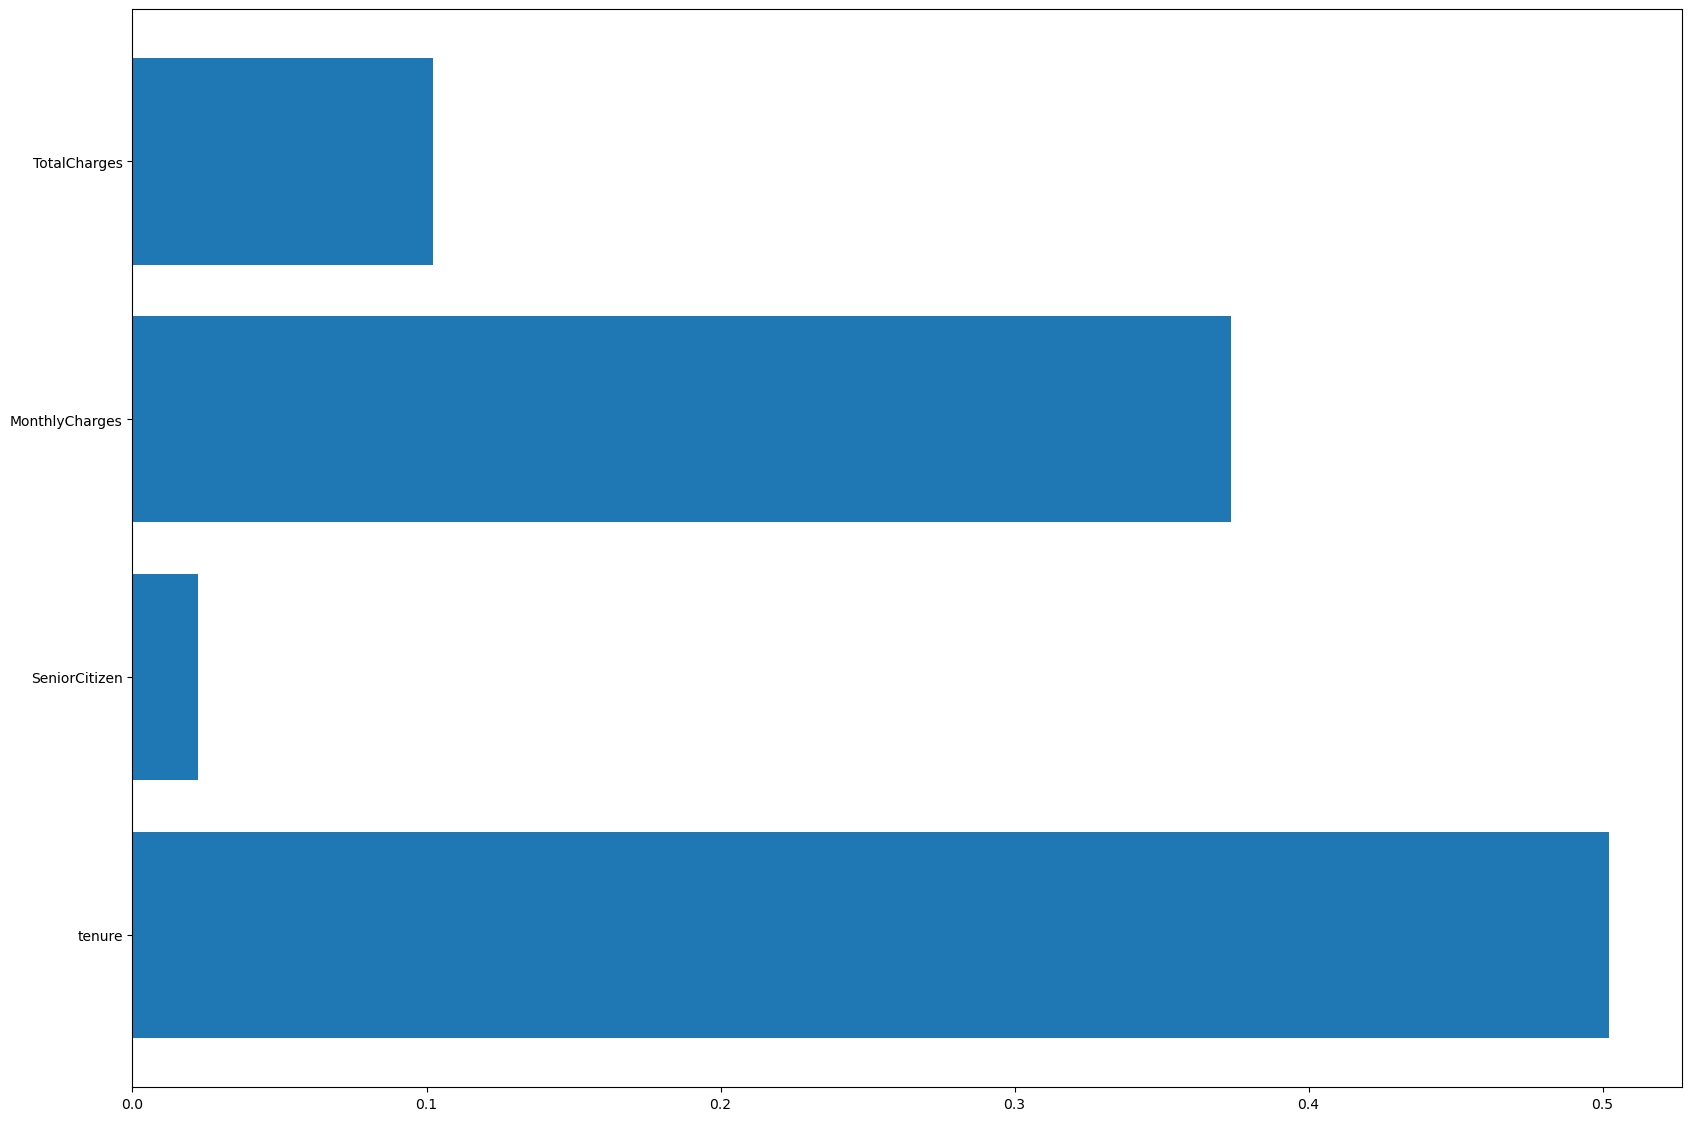

In [32]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

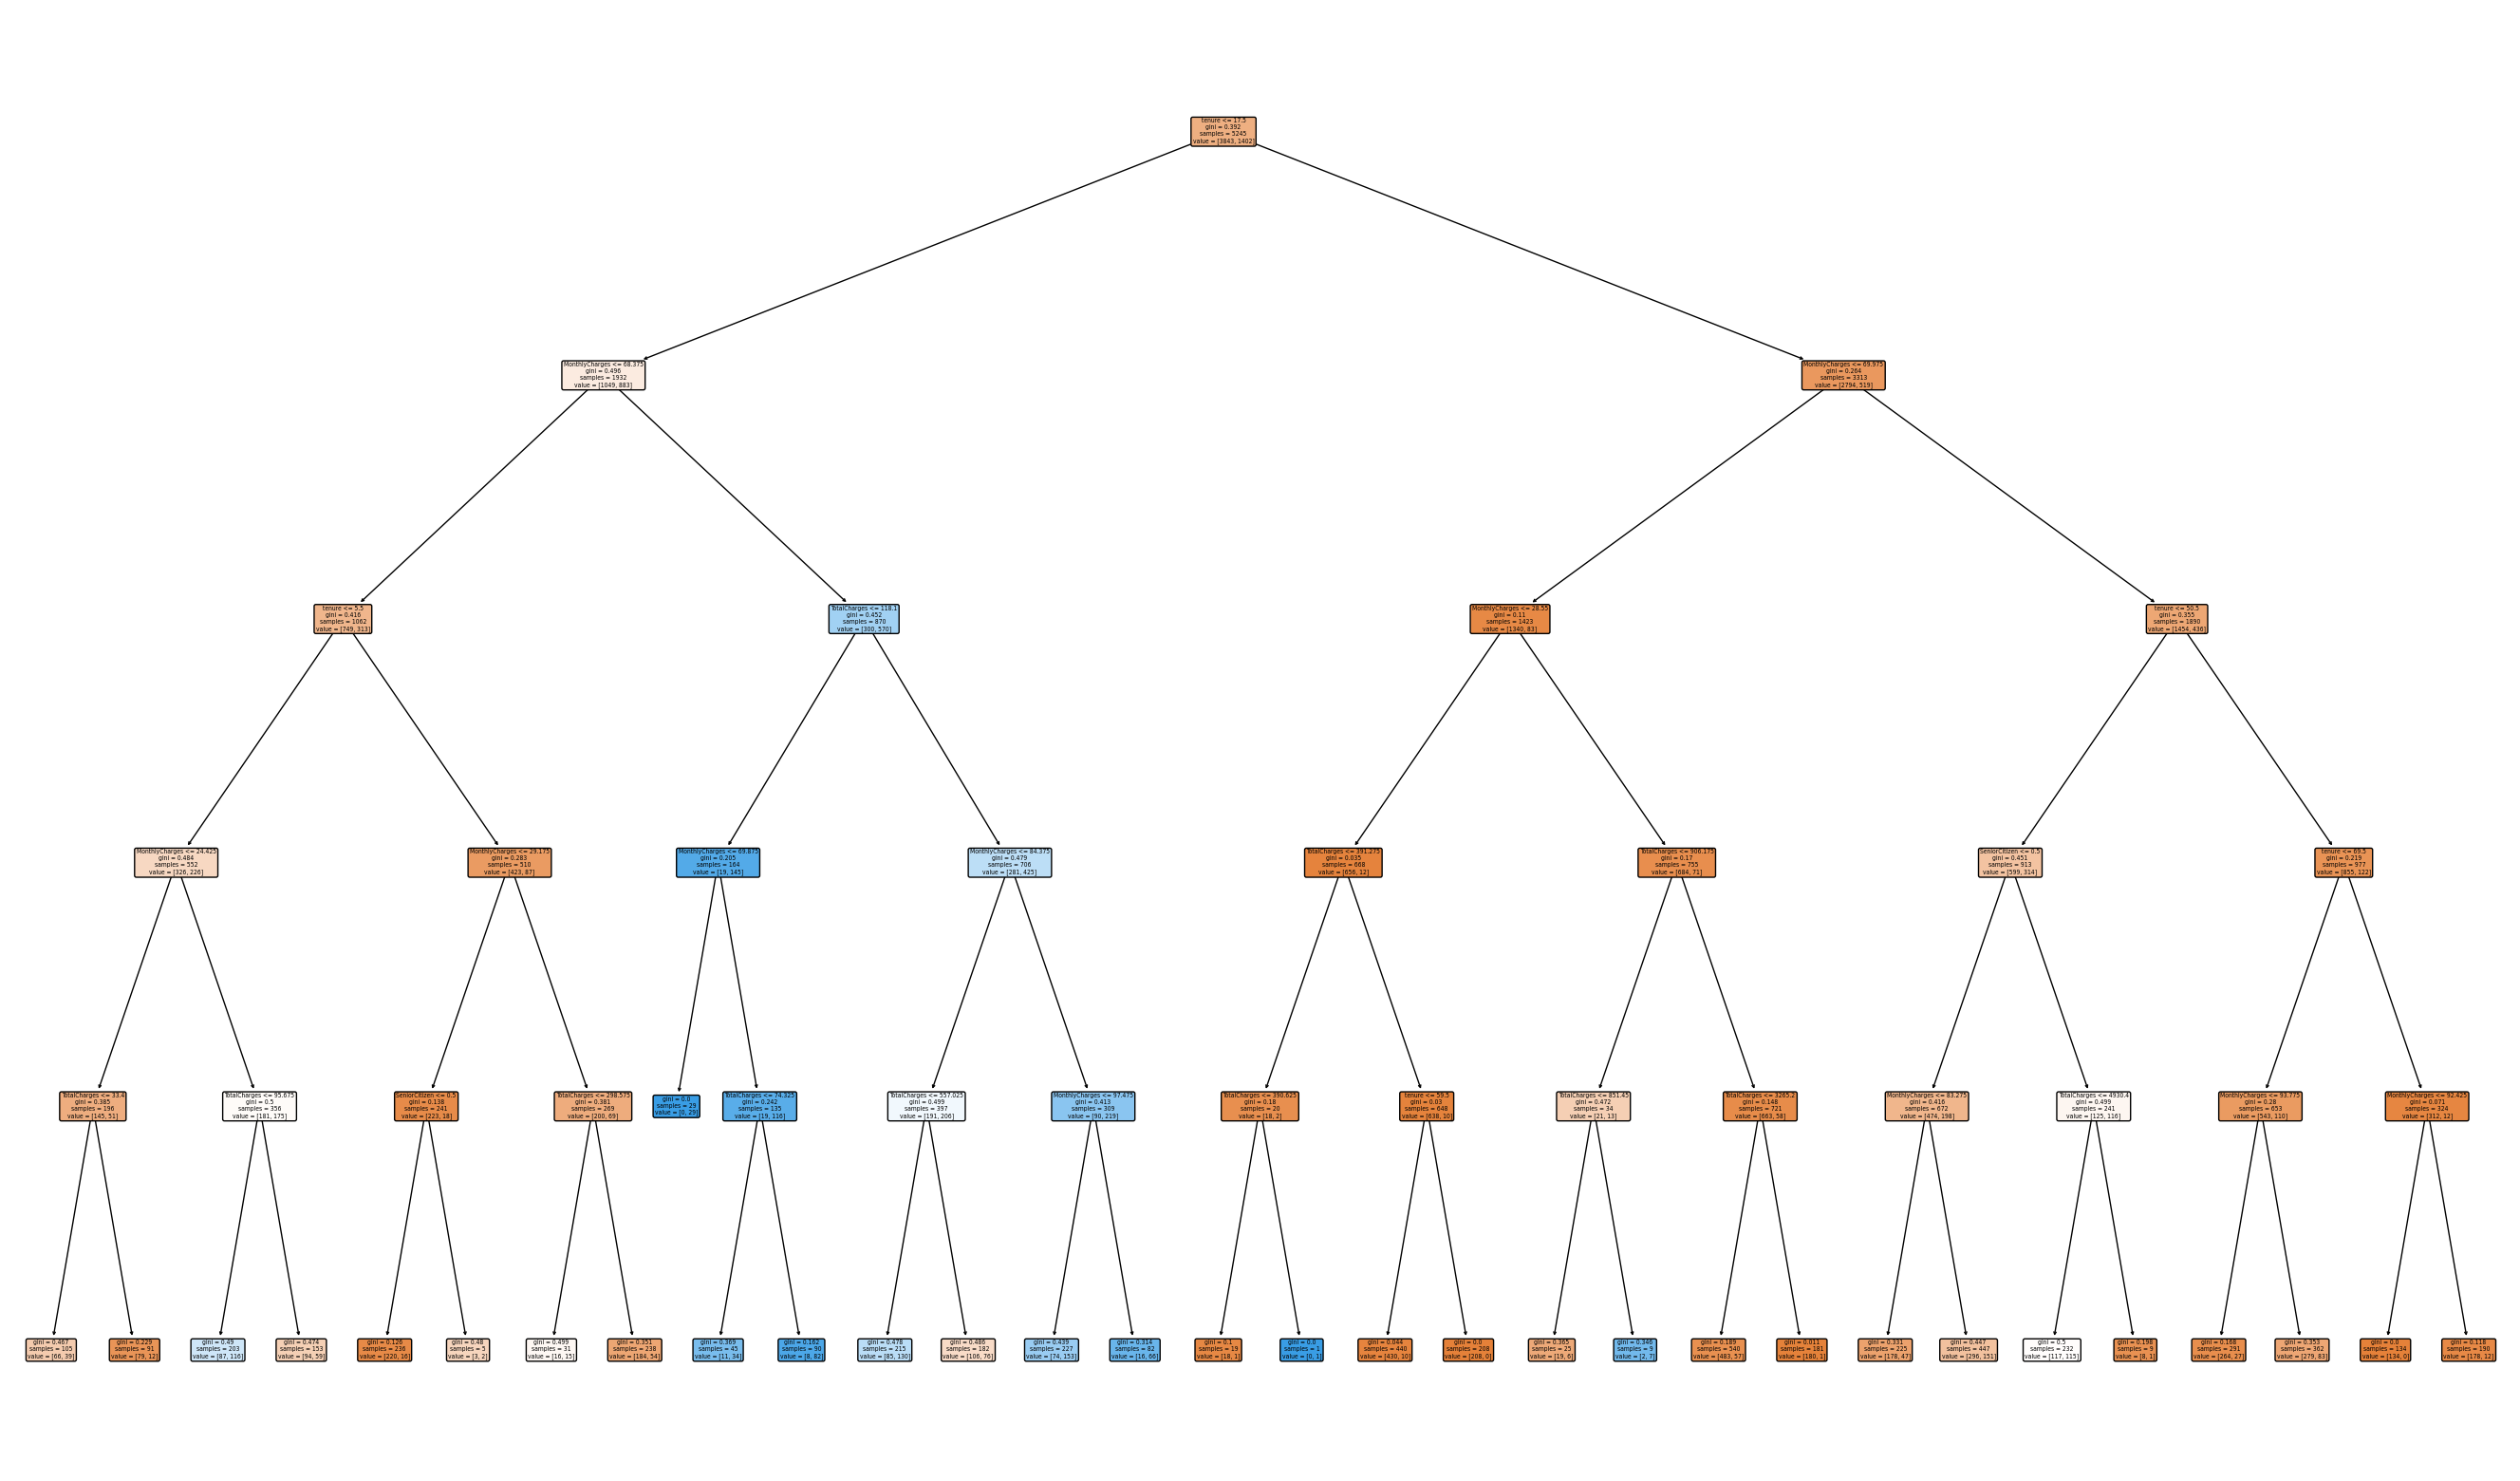

In [35]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=list(X.columns))
plt.show() 

## Function to train and test Decision Tree Classifier using different values for max_depth

In [ ]:
variable_depth_decision_tree

In [48]:
# List of models to train and evaluate
max_depth_list = []
    
def multi_model_evaluation(max_depth_list,X_train,y_train,X_test,y_test):
    for depth_integer in max_depth_list:
        model = DecisionTreeClassifier(max_depth=depth_integer)
        model.fit(X_train, y_train)
        y_pred_train_dt = model.predict(X_train)
        y_pred_test_dt = model.predict(X_test)
        performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})
        print(f'metrics for max depth = {depth_integer}')
        display(performance_df)

In [49]:
max_depth_list = range(1, 100, 1)
max_depth_list

range(1, 100)

In [50]:
multi_model_evaluation(max_depth_list,X_train,y_train,X_test,y_test)

metrics for max depth = 1


/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jameskenny/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Error_metric,Train,Test
0,Accuracy,0.73,0.74
1,Precision,0.00,0.00
2,Recall,0.00,0.00


metrics for max depth = 2


,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.66,0.61
2,Recall,0.41,0.44


metrics for max depth = 3


,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.66,0.61
2,Recall,0.41,0.44


metrics for max depth = 4


,Error_metric,Train,Test
0,Accuracy,0.78,0.78
1,Precision,0.66,0.61
2,Recall,0.41,0.44


metrics for max depth = 5


,Error_metric,Train,Test
0,Accuracy,0.80,0.79
1,Precision,0.69,0.61
2,Recall,0.44,0.45


metrics for max depth = 6


,Error_metric,Train,Test
0,Accuracy,0.80,0.78
1,Precision,0.68,0.58
2,Recall,0.51,0.48


metrics for max depth = 7


,Error_metric,Train,Test
0,Accuracy,0.81,0.77
1,Precision,0.71,0.55
2,Recall,0.52,0.45


metrics for max depth = 8


,Error_metric,Train,Test
0,Accuracy,0.83,0.76
1,Precision,0.74,0.53
2,Recall,0.54,0.44


metrics for max depth = 9


,Error_metric,Train,Test
0,Accuracy,0.84,0.76
1,Precision,0.75,0.54
2,Recall,0.60,0.49


metrics for max depth = 10


,Error_metric,Train,Test
0,Accuracy,0.85,0.76
1,Precision,0.80,0.54
2,Recall,0.61,0.48


metrics for max depth = 11


,Error_metric,Train,Test
0,Accuracy,0.87,0.75
1,Precision,0.81,0.52
2,Recall,0.66,0.49


metrics for max depth = 12


,Error_metric,Train,Test
0,Accuracy,0.89,0.74
1,Precision,0.85,0.49
2,Recall,0.71,0.47


metrics for max depth = 13


,Error_metric,Train,Test
0,Accuracy,0.90,0.74
1,Precision,0.87,0.49
2,Recall,0.75,0.49


metrics for max depth = 14


,Error_metric,Train,Test
0,Accuracy,0.92,0.73
1,Precision,0.88,0.48
2,Recall,0.80,0.51


metrics for max depth = 15


,Error_metric,Train,Test
0,Accuracy,0.93,0.73
1,Precision,0.91,0.48
2,Recall,0.83,0.52


metrics for max depth = 16


,Error_metric,Train,Test
0,Accuracy,0.95,0.73
1,Precision,0.93,0.48
2,Recall,0.87,0.52


metrics for max depth = 17


,Error_metric,Train,Test
0,Accuracy,0.95,0.72
1,Precision,0.94,0.46
2,Recall,0.88,0.51


metrics for max depth = 18


,Error_metric,Train,Test
0,Accuracy,0.96,0.71
1,Precision,0.96,0.45
2,Recall,0.90,0.49


metrics for max depth = 19


,Error_metric,Train,Test
0,Accuracy,0.97,0.72
1,Precision,0.96,0.45
2,Recall,0.93,0.50


metrics for max depth = 20


,Error_metric,Train,Test
0,Accuracy,0.98,0.72
1,Precision,0.96,0.45
2,Recall,0.95,0.52


metrics for max depth = 21


,Error_metric,Train,Test
0,Accuracy,0.98,0.71
1,Precision,0.98,0.44
2,Recall,0.95,0.50


metrics for max depth = 22


,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.98,0.45
2,Recall,0.96,0.52


metrics for max depth = 23


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.96,0.51


metrics for max depth = 24


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.97,0.50


metrics for max depth = 25


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.97,0.51


metrics for max depth = 26


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.97,0.49


metrics for max depth = 27


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.97,0.49


metrics for max depth = 28


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.49


metrics for max depth = 29


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 30


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 31


,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 32


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 33


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 34


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 35


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 36


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 37


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 38


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 39


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 40


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 41


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 42


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 43


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 44


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 45


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 46


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 47


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 48


,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.99,0.46
2,Recall,0.98,0.51


metrics for max depth = 49


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 50


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 51


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 52


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 53


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 54


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 55


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 56


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.43
2,Recall,0.98,0.48


metrics for max depth = 57


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 58


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 59


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.48


metrics for max depth = 60


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 61


,Error_metric,Train,Test
0,Accuracy,0.99,0.72
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 62


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 63


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 64


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 65


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 66


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 67


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 68


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 69


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.51


metrics for max depth = 70


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.48


metrics for max depth = 71


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 72


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 73


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.49


metrics for max depth = 74


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 75


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.48


metrics for max depth = 76


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 77


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.49


metrics for max depth = 78


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 79


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 80


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 81


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 82


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 83


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 84


,Error_metric,Train,Test
0,Accuracy,0.99,0.70
1,Precision,0.99,0.43
2,Recall,0.98,0.48


metrics for max depth = 85


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.43
2,Recall,0.98,0.50


metrics for max depth = 86


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.51


metrics for max depth = 87


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 88


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 89


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 90


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 91


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 92


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.51


metrics for max depth = 93


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 94


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 95


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 96


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.49


metrics for max depth = 97


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.44
2,Recall,0.98,0.50


metrics for max depth = 98


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


metrics for max depth = 99


,Error_metric,Train,Test
0,Accuracy,0.99,0.71
1,Precision,0.99,0.45
2,Recall,0.98,0.50


Note: optimal max depth appears to be 15

#### Round 2 Instructions
  - Fit a Decision Tree Classifier on the training data.
  - Check the accuracy on the test data.
  - Create a function that takes a list of integers and trains and tests a Decision Tree Classifier using each integer as max_depth